In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
def plot(image, anns):
  xs = anns['x'].to_list()
  ys = anns['y'].to_list()
  ws = anns['w'].to_list()
  hs = anns['h'].to_list()
  for x, y, w, h in zip(xs, ys, ws, hs):
    xmax = x+w
    ymax = y+h
    image = cv2.rectangle(image, (x,y), (xmax, ymax), (0, 220, 0), 1)
  return image

0.001994609832763672


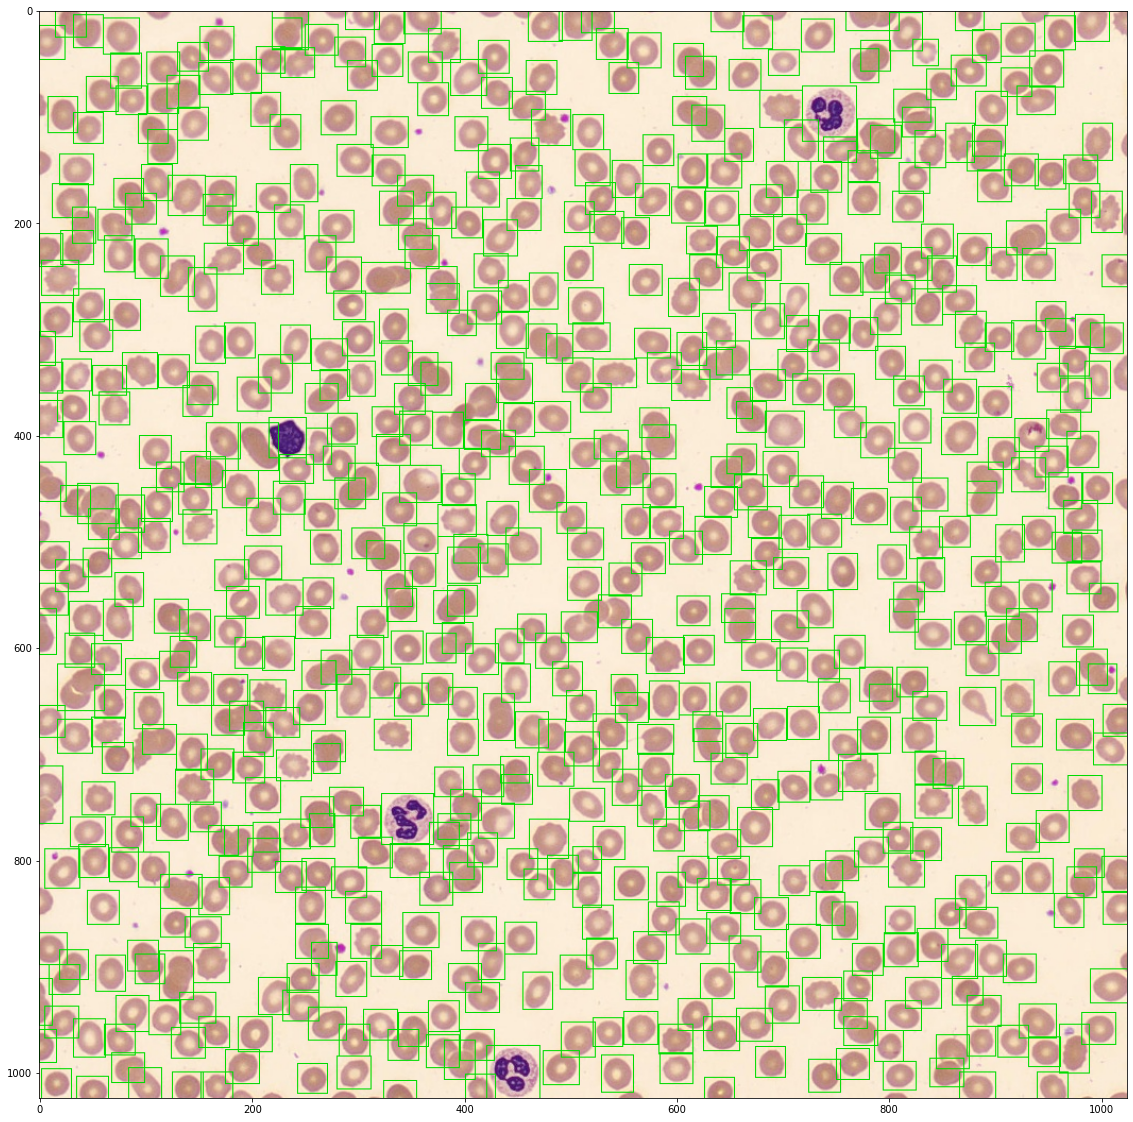

In [3]:
imgpath = 'rbc.jpg'
lblpath = 'label.pkl'
ann = pd.read_pickle(lblpath)
image = cv2.imread(imgpath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
t0 = time.time()
sample = plot(image, ann)
print(time.time() - t0)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
plt.imshow(sample)
plt.show()

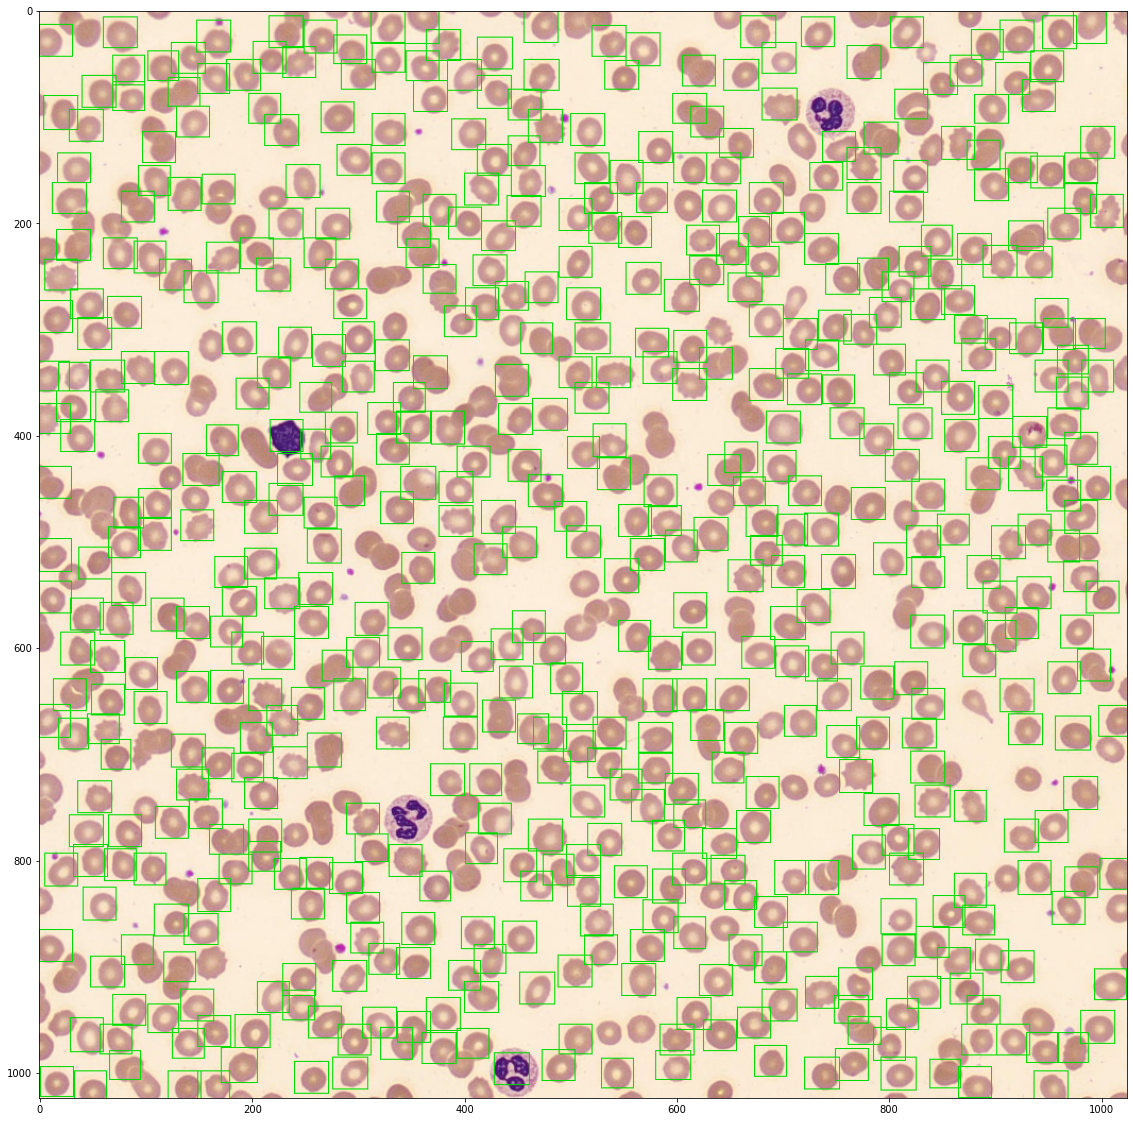

In [14]:
import centernet
import utils
import torch
import copy

image = cv2.imread(imgpath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
model = centernet.build()
hm, regr = model.pred_on_img(image)
sample = copy.deepcopy(image)
sample = utils.fullPLOT(sample, hm, regr, 0.8, 0.5)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
plt.imshow(sample)
plt.show()

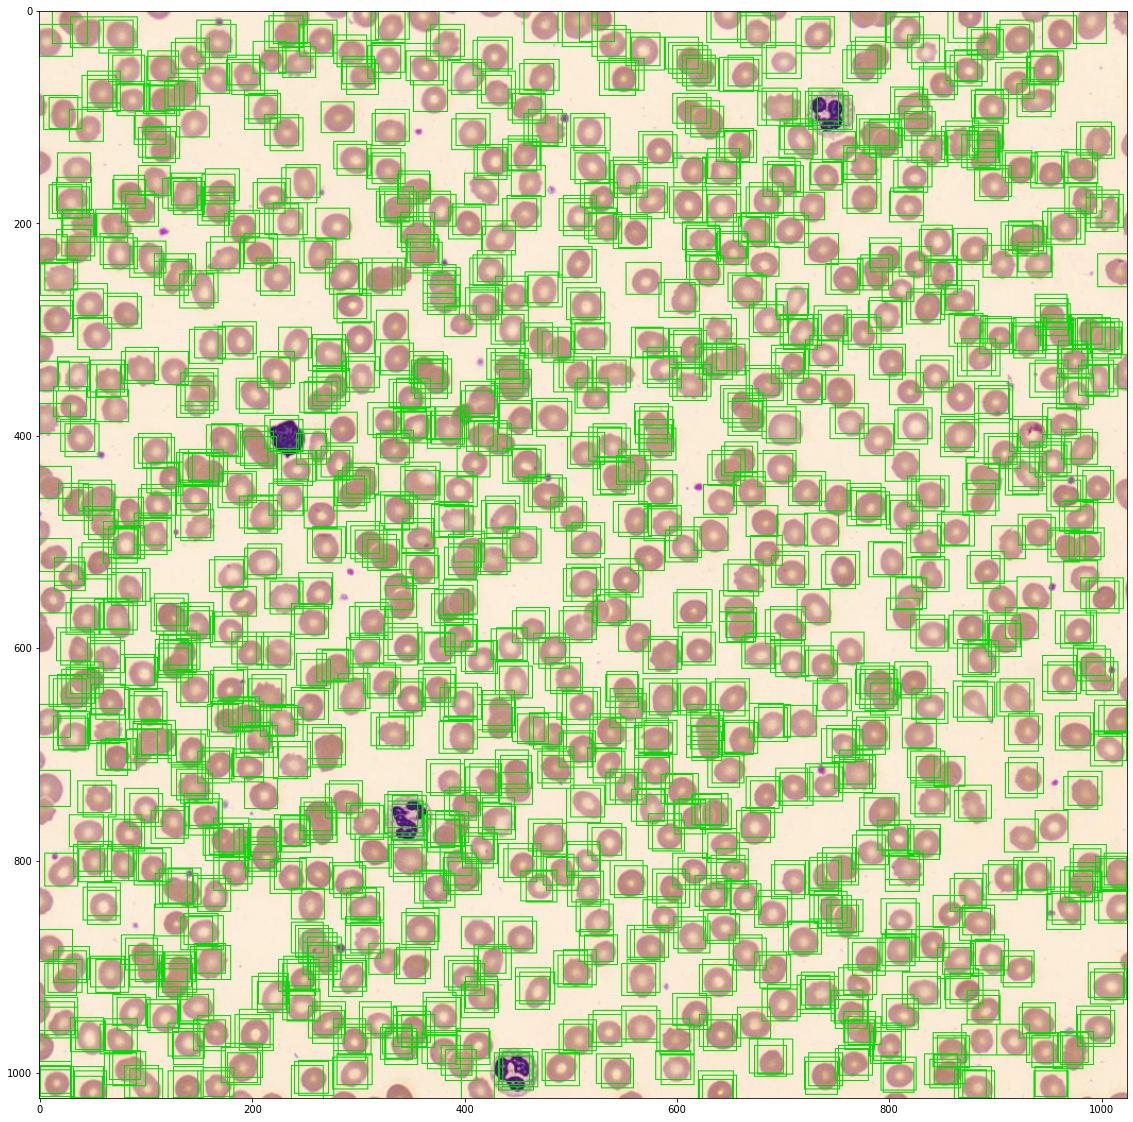

In [12]:
sample = utils.fullPLOT(image, hm, regr, 0.5, 0.7)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
plt.imshow(sample)
plt.show()